Import python libraries

In [8]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as tt
from torchvision.datasets import CIFAR100
from torch.utils.data.dataloader import DataLoader
import time
import pandas as pd

Import custom libraries

In [4]:
from functions import fit
from functions import ToDeviceLoader
from models.ResNet50 import Model
import processing

Define transforms and import dataset

In [5]:
num_classes = 100
batch_size = 64
epochs = 25

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

#LOADING DATA
stats = ((0.5074,0.4867,0.4411),(0.2011,0.1987,0.2025))
traintransform = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.RandomCrop(32,padding=4,padding_mode="reflect"),
    tt.ToTensor(),
    tt.Normalize(*stats)    
])

valtransform = tt.Compose([
    tt.ToTensor(),
    tt.Normalize(*stats) 
])


train_data = CIFAR100(
    download=False,
    train=True,
    root='data',
    transform=traintransform
)

test_data = CIFAR100(
    download=False,
    train=False,
    root='data',
    transform=valtransform
)

train_dl = DataLoader(train_data, batch_size, shuffle=True)
test_dl = DataLoader(test_data, batch_size)

train_dl = ToDeviceLoader(train_dl,device)
test_dl = ToDeviceLoader(test_dl,device)

Using cuda device


Define model paramters

In [6]:
model = Model(3,100).to(device)
max_lr=0.01
grad_clip = 0.1
weight_decay = 1e-4

loss_fn = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters(),weight_decay=weight_decay,lr=max_lr)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimiser, max_lr=max_lr, steps_per_epoch=len(train_dl), epochs=epochs)

Fitting model

In [7]:
start_time = time.time()
history = fit(batch_size,epochs,train_dl,test_dl,model,loss_fn,optimiser,scheduler,grad_clip)
time_elapsed =  time.time() - start_time
print(f"--- {(time_elapsed):>0.1f} seconds ---")

Epoch 1
 ----------------------
Batch 0:  [    0/50000]
Batch 100:  [ 6400/50000]
Batch 200:  [12800/50000]


KeyboardInterrupt: 

Data post-processing and export

In [ ]:
processing.export(history, model, time_elapsed)
processing.plot_history(history)

Import CSV and plot

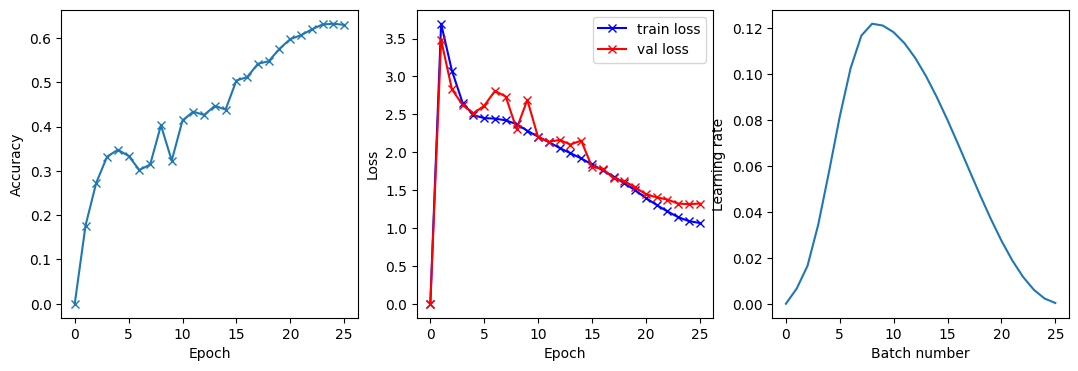

In [9]:
root = 'ResNet50_20230127_170407.csv'
history = pd.read_csv(root)
processing.plot_history(history)